In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import make_regression

In [12]:
X=np.linspace(-50,20,100)
noise=np.random.uniform(-50,15,100)
y=3*X*X+5*X+10+noise

In [13]:
y

array([ 7.23907959e+03,  7.03543826e+03,  6.81991886e+03,  6.61531819e+03,
        6.43106192e+03,  6.23303550e+03,  6.06329002e+03,  5.88370043e+03,
        5.64977053e+03,  5.49247303e+03,  5.30086824e+03,  5.13733992e+03,
        4.96698635e+03,  4.80872746e+03,  4.60741121e+03,  4.42999550e+03,
        4.27983169e+03,  4.11289338e+03,  3.94293901e+03,  3.85114272e+03,
        3.66805781e+03,  3.53171847e+03,  3.37497811e+03,  3.23259572e+03,
        3.09952678e+03,  2.99745112e+03,  2.86286871e+03,  2.67789980e+03,
        2.58111985e+03,  2.43533541e+03,  2.33803079e+03,  2.23434608e+03,
        2.09128164e+03,  1.97731054e+03,  1.89929502e+03,  1.79911669e+03,
        1.65533175e+03,  1.57943478e+03,  1.50660717e+03,  1.40909864e+03,
        1.27340494e+03,  1.20833590e+03,  1.15546482e+03,  1.04207027e+03,
        9.46789576e+02,  8.84928859e+02,  8.25120087e+02,  7.35179592e+02,
        6.84907515e+02,  6.41449881e+02,  5.93565689e+02,  4.87815883e+02,
        4.58986085e+02,  

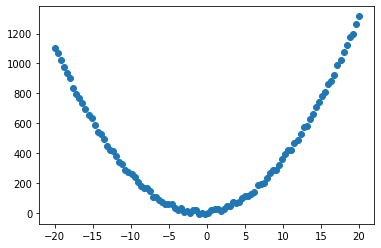

In [9]:
plt.scatter(X,y)

In [64]:
X_mod=(X-X.mean())/X.std()
Y_mod=(y-y.mean())/y.std()

In [71]:
X_tf=tf.constant(X_mod,dtype="float64")
Y_tf=tf.constant(Y_mod,dtype="float64")

In [72]:
a=tf.Variable(0.,dtype="float64")
b=tf.Variable(0.,dtype="float64")
c=tf.Variable(0.,dtype="float64")
iters=100
lr=0.1

In [73]:
def gradient_dec(X,Y):
    with tf.GradientTape() as tape:
        y_h=a*X*X+b*X+c

        error=Y-y_h
        loss=tf.reduce_mean(error**2)
        
        da,db,dc=tape.gradient(loss,[a,b,c])
        
        a.assign_sub(lr*da)
        b.assign_sub(lr*db)
        c.assign_sub(lr*dc)
        
        return loss

In [74]:
for i in range(iters):
    gradient_dec(X_tf,Y_tf)

In [75]:
y_pred=a*X_tf*X_tf+b*X_tf+c

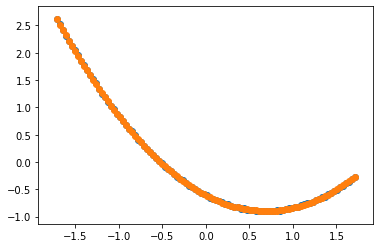

In [76]:
plt.scatter(X_tf,Y_tf)
plt.scatter(X_tf,y_pred)